In [1]:
import os
import math
from matplotlib.font_manager import FontProperties
import numpy as np
import pandas as pd

In [2]:
TVIX=pd.read_csv('C:/Users/user/Desktop/TVIX.csv',index_col='time')
#轉換成時間序列格式
TVIX.index=pd.to_datetime(TVIX.index)
TVIX.shape

(246, 1)

In [3]:
TVIX.head(n=3)

,TVIX
time,
2018-01-02,10.42
2018-01-03,10.24
2018-01-04,9.88


In [4]:
TVIX.tail(n=3)

,TVIX
time,
2018-12-25,21.83
2018-12-26,22.91
2018-12-27,20.38


In [5]:
TVIX=TVIX.sort_index()

In [6]:
TVIXtrain=TVIX[:-3]
TVIXtrain.tail(n=3)

,TVIX
time,
2018-12-21,20.13
2018-12-22,21.07
2018-12-24,20.49


In [7]:
TVIXtest = TVIX[-3:]
TVIXtest


,TVIX
time,
2018-12-25,21.83
2018-12-26,22.91
2018-12-27,20.38


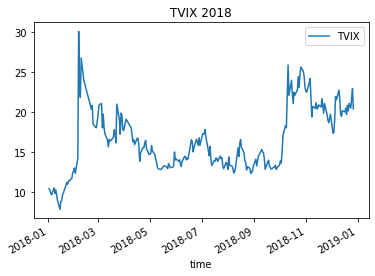

In [8]:
TVIX.plot(title='TVIX 2018')

In [9]:
from arch.unitroot import ADF


In [10]:
TVIXtrain=TVIXtrain.dropna()
print(ADF(TVIXtrain,max_lags=10).summary().as_text())


   Augmented Dickey-Fuller Results   
Test Statistic                 -2.720
P-value                         0.071
Lags                                3
-------------------------------------

Trend: Constant
Critical Values: -3.46 (1%), -2.87 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


In [33]:
TVIXroot=TVIXtrain.diff()[1:]
TVIXroot=TVIXroot.dropna()
print(ADF(TVIXroot,max_lags=10).summary().as_text())


   Augmented Dickey-Fuller Results   
Test Statistic                 -9.332
P-value                         0.000
Lags                                2
-------------------------------------

Trend: Constant
Critical Values: -3.46 (1%), -2.87 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


In [34]:
from statsmodels.tsa import stattools
LjungBox=stattools.q_stat(stattools.acf(TVIXroot)[1:12],len(TVIXroot))
LjungBox[1][-1]

C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:572: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning


0.00012052088856413821

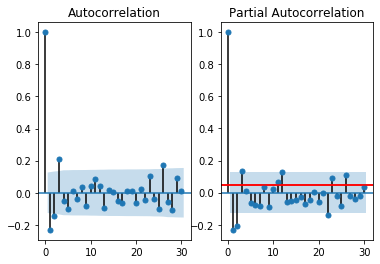

In [35]:
from statsmodels.graphics.tsaplots import *
import matplotlib.pyplot as plt
#將畫面一分為二
axe1=plt.subplot(121)
axe2=plt.subplot(122)

#在第一個畫面中畫出序列的自相關係數圖 
plot1=plot_acf(TVIXroot,lags=30,ax=axe1),plt.axhline(0.05, color= 'r')

#在第二個畫面中畫出序列的偏自相關係數圖
plot2=plot_pacf(TVIXroot,lags=30,ax=axe2),plt.axhline(0.05, color= 'r')

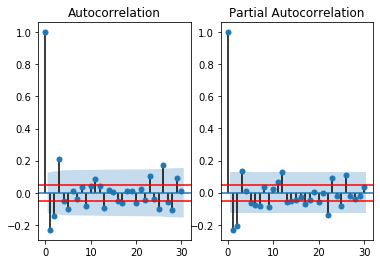

In [52]:
axe1=plt.subplot(121)
#在第一個畫面中畫出序列的自相關係數圖 
plot1=plot_acf(TVIXroot,lags=30,ax=axe1),plt.axhline(0.05, color= 'r'),plt.axhline(-0.05, color= 'r')
axe2=plt.subplot(122)
plot2=plot_pacf(TVIXroot,lags=30,ax=axe2),plt.axhline(0.05, color= 'r'),plt.axhline(-0.05, color= 'r')

In [60]:
from statsmodels.tsa import arima_model

In [92]:
model1=arima_model.ARIMA(TVIXroot,order=(6,0,5)).fit()
model1.summary()

C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                   TVIX   No. Observations:                  242
Model:                     ARMA(6, 5)   Log Likelihood                -442.531
Method:                       css-mle   S.D. of innovations              1.484
Date:                Wed, 24 Jun 2020   AIC                            911.062
Time:                        16:41:33   BIC                            956.419
Sample:                             0   HQIC                           929.333
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0297      0.016      1.805      0.071      -0.003       0.062
ar.L1.TVIX    -1.1140      0.135     -8.237      0.000      -1.379      -0.849
ar.L2.TVIX    -0.5583      0.081     -6.883      0.000      -0.717      -0.399
ar.L3.TVIX     0.0539      0.066      0.822      0.411      -0.075       0.183
ar.L4.TVIX     0.9326      0.067     13.966      0.000       0.802       1.064
ar.L5.TVIX     0.9337      0.128      7.272      0.000       0.682       1.185
ar.L6.TVIX     0.2349      0.068      3.455      0.001       0.102       0.368
ma.L1.TVIX     0.8513      0.132      6.447      0.000       0.592       1.110
ma.L2.TVIX     0.1676      0.051      3.316      0.001       0.069       0.267
ma.L3.TVIX    -0.1832      0.042     -4.328      0.000      -0.266      -0.100
ma.L4.TVIX    -0.9903      0.048    -20.798      0.000      -1.084      -0.897
ma.L5.TVIX    -0.8454      0.137     -6.182      0.000      -1.113      -0.577
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0584           -0.0000j            1.0584           -0.0000
AR.2           -0.0762           -1.0067j            1.0096           -0.2620
AR.3           -0.0762           +1.0067j            1.0096            0.2620
AR.4           -1.1928           -0.3984j            1.2575           -0.4487
AR.5           -1.1928           +0.3984j            1.2575            0.4487
AR.6           -2.4953           -0.0000j            2.4953           -0.5000
MA.1            1.0000           -0.0000j            1.0000           -0.0000
MA.2           -0.0495           -0.9989j            1.0001           -0.2579
MA.3           -0.0495           +0.9989j            1.0001            0.2579
MA.4           -1.0361           -0.3302j            1.0875           -0.4509
MA.5           -1.0361           +0.3302j            1.0875            0.4509
-----------------------------------------------------------------------------
"""

In [93]:
model2=arima_model.ARIMA(TVIXroot,order=(5,0,2)).fit()
model2.summary()

C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                   TVIX   No. Observations:                  242
Model:                     ARMA(5, 2)   Log Likelihood                -446.983
Method:                       css-mle   S.D. of innovations              1.526
Date:                Wed, 24 Jun 2020   AIC                            911.966
Time:                        16:42:57   BIC                            943.366
Sample:                             0   HQIC                           924.615
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0292      0.015      1.887      0.059      -0.001       0.060
ar.L1.TVIX    -0.1545      0.162     -0.952      0.341      -0.473       0.164
ar.L2.TVIX     0.7097      0.122      5.821      0.000       0.471       0.949
ar.L3.TVIX     0.3517      0.075      4.686      0.000       0.205       0.499
ar.L4.TVIX     0.1238      0.069      1.787      0.074      -0.012       0.260
ar.L5.TVIX    -0.1759      0.063     -2.791      0.005      -0.299      -0.052
ma.L1.TVIX    -0.1237      0.155     -0.798      0.425      -0.428       0.180
ma.L2.TVIX    -0.8763      0.155     -5.657      0.000      -1.180      -0.573
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.0893           -0.0000j            1.0893           -0.5000
AR.2           -0.7156           -1.3223j            1.5035           -0.3289
AR.3           -0.7156           +1.3223j            1.5035            0.3289
AR.4            1.0731           -0.0000j            1.0731           -0.0000
AR.5            2.1513           -0.0000j            2.1513           -0.0000
MA.1            1.0000           +0.0000j            1.0000            0.0000
MA.2           -1.1411           +0.0000j            1.1411            0.5000
-----------------------------------------------------------------------------
"""

In [94]:
model1.conf_int()

,0,1
const,-0.002554,0.061854
ar.L1.TVIX,-1.379056,-0.848937
ar.L2.TVIX,-0.717246,-0.399295
ar.L3.TVIX,-0.074731,0.182586
ar.L4.TVIX,0.801756,1.063525
ar.L5.TVIX,0.682053,1.185394
ar.L6.TVIX,0.101641,0.368172
ma.L1.TVIX,0.592495,1.110153
ma.L2.TVIX,0.068541,0.266671
ma.L3.TVIX,-0.266202,-0.100260


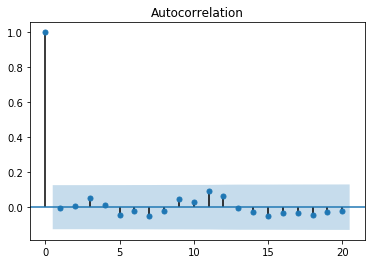

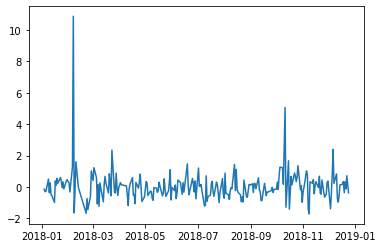

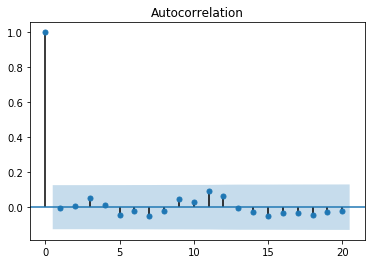

In [95]:
stdresid=model1.resid/math.sqrt(model1.sigma2)
plt.plot(stdresid)
plot_acf(stdresid,lags=20)

In [96]:
LjungBox=stattools.q_stat(stattools.acf(stdresid)[1:13],len(stdresid))
LjungBox[1][-1]

C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:572: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning


0.9107199528443483

In [97]:
#增加Ljung-Box檢定的落後階數
LjungBox=stattools.q_stat(stattools.acf(stdresid)[1:20],len(stdresid))
LjungBox[1][-1]

0.9844341638108919

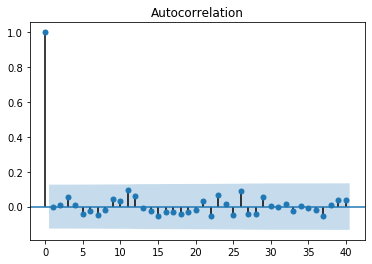

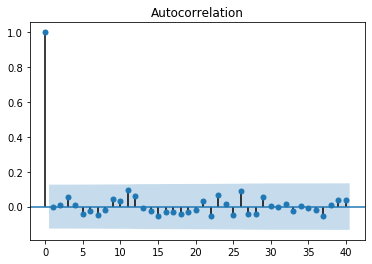

In [98]:
plot_acf(stdresid,lags=40)

In [106]:
#用model3 預測未來3期的CPI
model1.forecast(9)[0]

array([ 0.24547436, -0.16862746, -0.24842445,  0.24401638,  0.26071064,
       -0.48903298,  0.09624593,  0.15119377,  0.17943489])

In [105]:
TVIXtestdiff=TVIXtest.diff()[1:]
TVIXtestdiff

,TVIX
time,
2018-12-26,1.08
2018-12-27,-2.53


In [109]:
TVIXroot=TVIXtrain.diff()[1:]
TVIXroot.tail()

,TVIX
time,
2018-12-19,-0.77
2018-12-20,1.12
2018-12-21,-0.69
2018-12-22,0.94
2018-12-24,-0.58
